In [181]:
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import patches

from scipy import stats
from scipy.spatial import ConvexHull

import seaborn as sns

import datetime

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings; warnings.simplefilter('ignore')
sns.set_style("white")


import warnings; warnings.filterwarnings(action='once')

damage = pd.read_csv('https://raw.githubusercontent.com/labs13-quake-viewer/ds-data/danielle-romanoff/final_damage.csv')
damage.columns

Index(['Tsunami', 'Name', 'Latitude', 'Longitude', 'Depth', 'Magnitude',
       'Date', 'Deaths', 'Missing', 'Injuries', 'Damage', 'Houses Destroyed',
       'Houses Damaged'],
      dtype='object')

In [182]:
damage['Date'] = pd.to_datetime(damage['Date'])
damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,40.0,8.4,1678-06-18,1000.0,0.0,0.0,12500000.0,1000.0,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,30.0,8.5,1687-10-20,10000.0,0.0,0.0,12500000.0,0.0,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,15.0,5.3,1688-01-01,0.0,0.0,0.0,2500000.0,0.0,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,5.0,6.8,1689-03-01,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,6.0,5.0,1699-02-11,100.0,0.0,0.0,12500000.0,0.0,0.0


In [183]:
# Normalize each column
# damage["Magnitude"]=((damage["Magnitude"]-damage["Magnitude"].min())/(damage["Magnitude"].max()-damage["Magnitude"].min()))*20
damage["Depth"]=((damage["Depth"]-damage["Depth"].min())/(damage["Depth"].max()-damage["Depth"].min()))*20
damage["Deaths"]=((damage["Deaths"]-damage["Deaths"].min())/(damage["Deaths"].max()-damage["Deaths"].min()))*20
damage["Missing"]=((damage["Missing"]-damage["Missing"].min())/(damage["Missing"].max()-damage["Missing"].min()))*20
damage["Injuries"]=((damage["Injuries"]-damage["Injuries"].min())/(damage["Injuries"].max()-damage["Injuries"].min()))*20
damage["Damage"]=((damage["Damage"]-damage["Damage"].min())/(damage["Damage"].max()-damage["Damage"].min()))*20
damage["Houses Destroyed"]=((damage["Houses Destroyed"]-damage["Houses Destroyed"].min())/(damage["Houses Destroyed"].max()-damage["Houses Destroyed"].min()))*20
damage["Houses Damaged"]=((damage["Houses Damaged"]-damage["Houses Damaged"].min())/(damage["Houses Damaged"].max()-damage["Houses Damaged"].min()))*20
damage.head()

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
0,1.0,"PERU: LIMA,SALINAS-HUAURA,LIMA,CALLAO,CHANCAY",-9.0,-79.0,1.204819,8.4,1678-06-18,0.080720,0.0,0.0,9.057971,0.003728,0.0
1,1.0,PERU: LIMA,-13.5,-76.5,0.903614,8.5,1687-10-20,0.807203,0.0,0.0,9.057971,0.000000,0.0
2,0.0,RUSSIA: TERSK,43.7,44.7,0.451807,5.3,1688-01-01,0.000000,0.0,0.0,1.811594,0.000000,0.0
3,0.0,ECUADOR: TIXAN,-2.2,-78.9,0.150602,6.8,1689-03-01,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,BALKANS NW: SLOVENIA: LJUBLJANA,45.6,15.3,0.180723,5.0,1699-02-11,0.008072,0.0,0.0,9.057971,0.000000,0.0


In [184]:
damage.sort_values(['Magnitude'], ascending=True)

,Tsunami,Name,Latitude,Longitude,Depth,Magnitude,Date,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
80,0.0,RUSSIA: CAUCASUS,41.900,47.800,0.090361,4.0,1885-05-01,0.000000,0.000000,0.000000,1.811594,0.000000,0.000000
926,0.0,KENTUCKY: BARDWELL,36.870,-88.980,0.090361,4.0,2003-06-06,0.000000,0.000000,0.000000,0.362319,0.000000,0.000000
1007,0.0,OKLAHOMA: GUTHRIE,35.937,-97.271,0.150602,4.1,2014-02-09,0.000000,0.000000,0.000000,0.362319,0.000000,0.000000
937,0.0,PHILIPPINES: BOHOL ISLAND: TUBIGON,9.926,124.038,1.054217,4.1,2004-05-19,0.000000,0.000000,0.000000,0.362319,0.000000,0.000000
303,0.0,IRAN: SHIRVAN,37.500,57.800,0.271084,4.1,1947-07-10,0.000000,0.000000,0.000000,1.811594,0.000000,0.000000
29,0.0,GEORGIA: KAKHETIYA,41.800,45.200,0.210843,4.2,1811-01-01,0.000000,0.000000,0.000000,1.811594,0.000000,0.000000
907,0.0,CALIFORNIA: LOS ANGELES,34.059,-118.387,0.150602,4.2,2001-09-09,0.000000,0.000000,0.000000,0.362319,0.000000,0.000000
70,0.0,"UKRAINE: CARPATHIANS: DOLGE, MARAMOROSH PROVINCE",48.400,23.300,0.150602,4.3,1872-12-26,0.000000,0.000000,0.000000,1.811594,0.000000,0.000000
150,0.0,ITALY: ETNA,37.700,15.200,0.030120,4.3,1911-10-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
44,0.0,AZERBAIJAN: APSCHERON PENINSULA,40.500,50.000,0.090361,4.3,1842-01-02,0.000000,0.000000,0.000000,1.811594,0.000000,0.000000


In [0]:
X = damage.drop(['Name', 'Date'], axis=1)
Y = damage['Name']

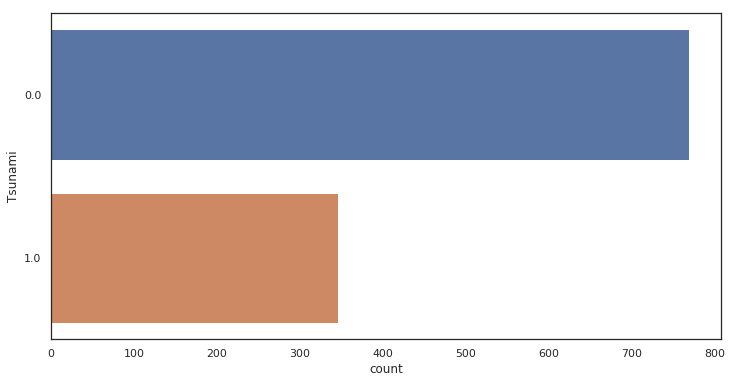

In [186]:
# Showing how many earthquakes caused a Tsunami

sns.countplot(y="Tsunami", data=X)
plt.show()

In [187]:
magnitude = damage.groupby('Magnitude').sum()
magnitude

,Tsunami,Latitude,Longitude,Depth,Deaths,Missing,Injuries,Damage,Houses Destroyed,Houses Damaged
Magnitude,,,,,,,,,,
4.0,0.0,78.770,-41.180,0.180723,0.000000,0.000000,0.000000,2.173913,0.000000,0.000000
4.1,0.0,83.363,84.567,1.475904,0.000000,0.000000,0.000000,2.536232,0.000000,0.000000
4.2,0.0,75.859,-73.187,0.361446,0.000000,0.000000,0.000000,2.173913,0.000000,0.000000
4.3,0.0,200.770,158.667,0.722892,0.000000,0.000000,0.001468,5.797101,0.000000,0.000373
4.4,0.0,128.364,294.775,3.554217,0.004278,0.000000,0.001766,24.275388,0.000186,0.002123
4.5,0.0,423.220,-85.685,5.180723,0.004359,0.000000,0.032463,17.753623,0.009931,0.004843
4.6,1.0,409.558,-47.610,6.716867,0.016306,0.000000,0.060274,44.927586,0.026431,0.010433
4.7,0.0,299.403,-80.936,5.090361,0.020503,0.000000,0.006866,9.420290,0.003728,0.000560
4.8,1.0,382.320,47.596,4.307229,0.009767,0.000000,0.006493,35.144965,0.000000,0.000011


In [188]:
tsu_mean = damage.groupby('Tsunami').mean()

tsu_mean = tsu_mean.T

tsu_mean

Tsunami,0.0,1.0
Latitude,25.091315,15.616624
Longitude,25.953017,30.603009
Depth,1.090134,1.013737
Magnitude,6.256307,7.317919
Deaths,0.130022,0.241327
Missing,0.011085,0.061322
Injuries,0.054592,0.077979
Damage,5.562599,5.972663
Houses Destroyed,0.018028,0.068363
Houses Damaged,0.010265,0.068280


In [189]:
tsu_mean.shape

(10, 2)

In [190]:
sample_size = 10
x , y = 0, 0

for row in tsu_mean.iterrows():
  
  
  
  var_a = tsu_mean.iloc[x][1.0]
  var_b = tsu_mean.iloc[y][0.0]
  
  a = var_a.var(ddof=1)
  b = var_b.var(ddof=1)
  
  s = np.sqrt((var_a + var_b)/ 2)
  
  t_stat = (var_a.mean() - var_b.mean())/(s*np.sqrt(2/sample_size))
  
  degree_of_freedom = 2*sample_size - 2
  
  p_value = 1 - stats.t.cdf(t_stat, df=degree_of_freedom)
  
  x += 1
  y += 1
  
  print(t_stat)
 
  print(p_value)
  print('='*20)

-4.695971700359976
0.999909983776933
1.955297039482674
0.033127697685225055
-0.1665589926560549
0.5652131082360541
0.9111887657571087
0.18711885848304988
0.5775939210145622
0.28534675482898364
0.5903808442266774
0.2811374886333372
0.20311548140593053
0.4206615886741074
0.381801258928371
0.3535393429317797
0.5415466787731354
0.29738559084248894
0.6546159415793591
0.2604963810028815


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: Degrees of freedom <= 0 for slice
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [191]:
df_approved = damage.loc[damage['Tsunami'].isin([1.0])]

df_denied = damage.loc[damage['Tsunami'].isin([0.0])]


print(stats.ttest_ind(a = df_approved.Magnitude, b = df_denied.Magnitude))


print(stats.ttest_ind(a = df_approved.Deaths, b = df_denied.Deaths))


print(stats.ttest_ind(a = df_approved['Houses Destroyed'], b = df_denied['Houses Destroyed']))

Ttest_indResult(statistic=18.145596046642236, pvalue=1.1598783796984394e-64)
Ttest_indResult(statistic=1.7025955680714975, pvalue=0.0889229983578646)
Ttest_indResult(statistic=1.267948286708823, pvalue=0.20508159384156965)


For the categorical features, explore by creating "cross tabs" between them and the class label, and apply the Chi-squared test to them. There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

In [192]:
tsu_crosstab = pd.crosstab(damage.Tsunami,[damage.Latitude, damage.Longitude, damage.Magnitude, damage.Depth, damage.Deaths,
                                           damage.Missing, damage.Injuries, damage.Damage, damage['Houses Destroyed'], damage['Houses Damaged'] ],
                           margins=True)


tsu_list = tsu_crosstab.sum().sort_values().tolist()


stats.chisquare(tsu_list)

Power_divergenceResult(statistic=1239882.0, pvalue=0.0)

In [193]:
tsu_crosstab_a = pd.crosstab(damage.Tsunami, [damage.Magnitude])
tsu_crosstab_a

Magnitude,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,9.0,9.2,9.5
Tsunami,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,2,3,2,5,5,13,10,10,11,10,19,19,16,15,20,27,28,22,28,21,46,34,38,25,26,22,25,22,25,20,20,16,13,24,10,34,22,16,16,15,4,5,2,1,0,0,1,0,1,0,0,0
1.0,0,0,0,0,0,0,1,0,1,0,0,0,2,3,0,2,2,1,0,3,5,4,6,6,5,13,6,15,10,16,22,17,14,13,8,25,17,22,21,20,10,9,12,15,5,4,4,3,1,1,1,1


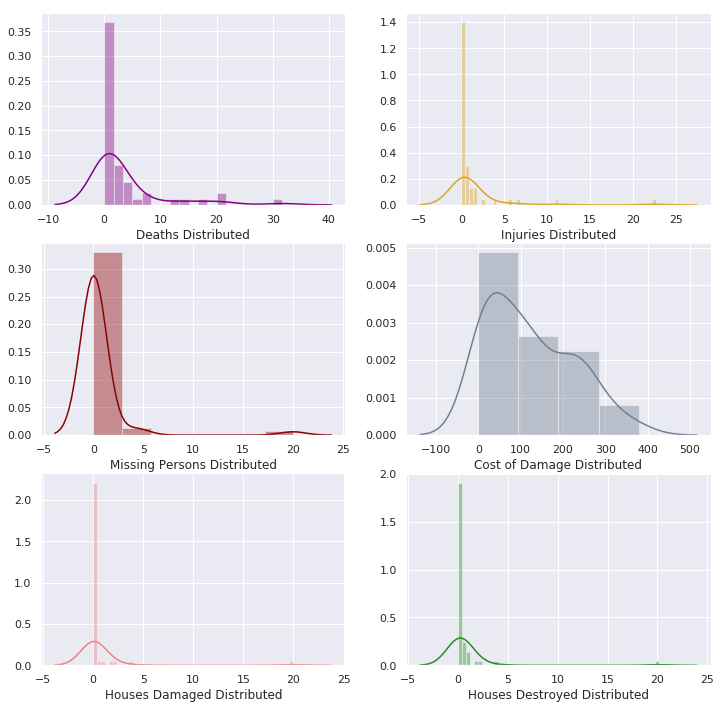

In [194]:
sns.set(style='darkgrid')

f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)

sns.distplot(a = magnitude.Deaths, bins= None, hist=True, kde=True, color = 'purple',  axlabel='Deaths Distributed', ax=axes[0, 0])

sns.distplot(a = magnitude.Injuries, bins= None, hist=True, kde=True, color = 'goldenrod',  axlabel='Injuries Distributed', ax=axes[0, 1])

sns.distplot(a = magnitude.Missing, bins= None, hist=True, kde=True, color = 'darkred', axlabel='Missing Persons Distributed', ax=axes[1, 0])

sns.distplot(a = magnitude.Damage, bins= None, hist=True, kde=True, color = 'slategrey', axlabel='Cost of Damage Distributed', ax=axes[1, 1])

sns.distplot(a = magnitude['Houses Destroyed'], bins= None, hist=True, kde=True, color = 'forestgreen', axlabel='Houses Destroyed Distributed', ax=axes[2, 1])

sns.distplot(a = magnitude['Houses Damaged'], bins= None, hist=True, kde=True, color = 'lightcoral', axlabel='Houses Damaged Distributed', ax=axes[2, 0])

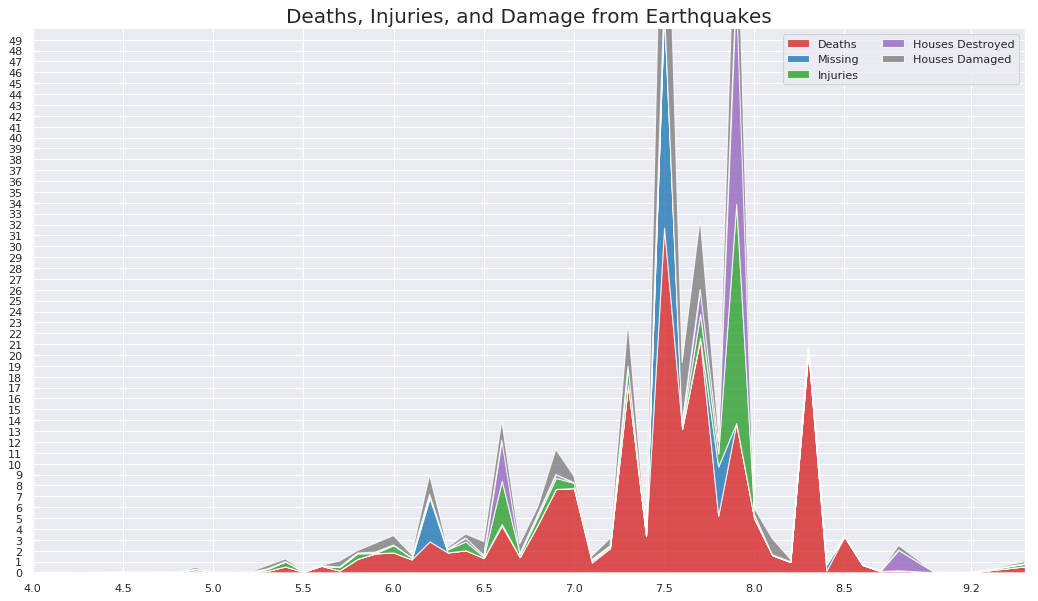

In [241]:
# Decide Colors 
mycolors = ['tab:red', 'tab:blue', 'tab:green',  'tab:purple', 'tab:grey']      

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
llabels = tsu_mean.index.drop(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Damage'])

# Prepare data
x  = magnitude.index.values.tolist()
y0 = magnitude['Deaths'].values.tolist()
y1 =magnitude['Injuries'].values.tolist()
y2 =magnitude['Missing'].values.tolist()
y4 = magnitude['Houses Destroyed'].values.tolist()
y5 = magnitude['Houses Damaged'].values.tolist()

y = np.vstack([y0, y2, y4, y5, y1])

# Plot for each column

ax = plt.gca()
ax.stackplot(x, y, labels=labels, colors=mycolors, alpha=0.8)

# Decorations
ax.set_title('Deaths, Injuries, and Damage from Earthquakes', fontsize=18)
ax.set(ylim=[0, 50])
ax.legend(fontsize=10, ncol=2)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(0,50, 1), fontsize=10)
plt.xlim(x[0], x[-1])

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

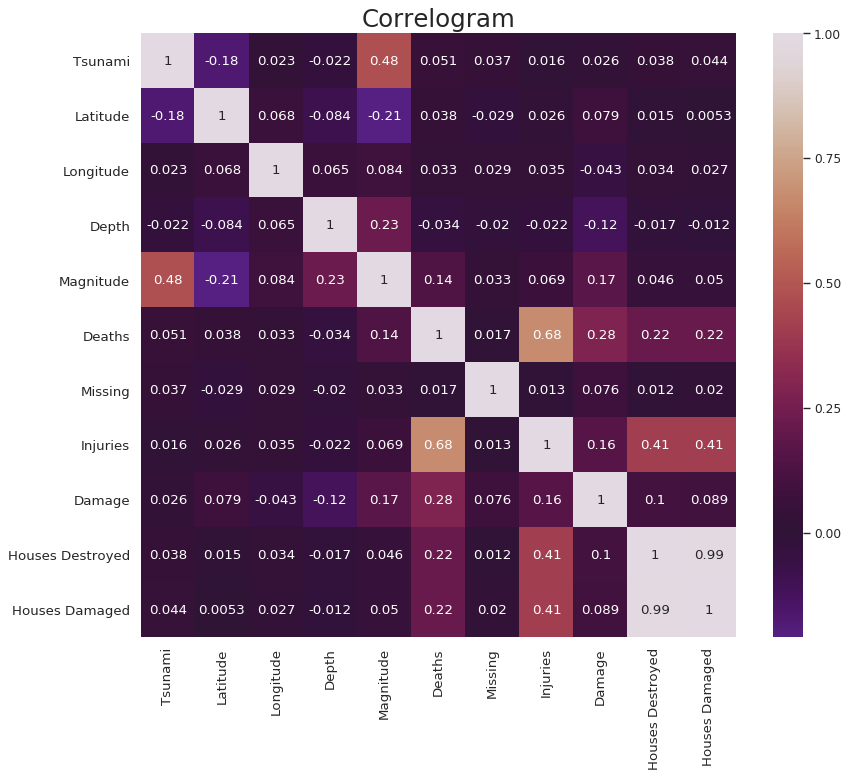

In [119]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(damage.corr(), xticklabels=damage.corr().columns, yticklabels=damage.corr().columns, cmap='twilight', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

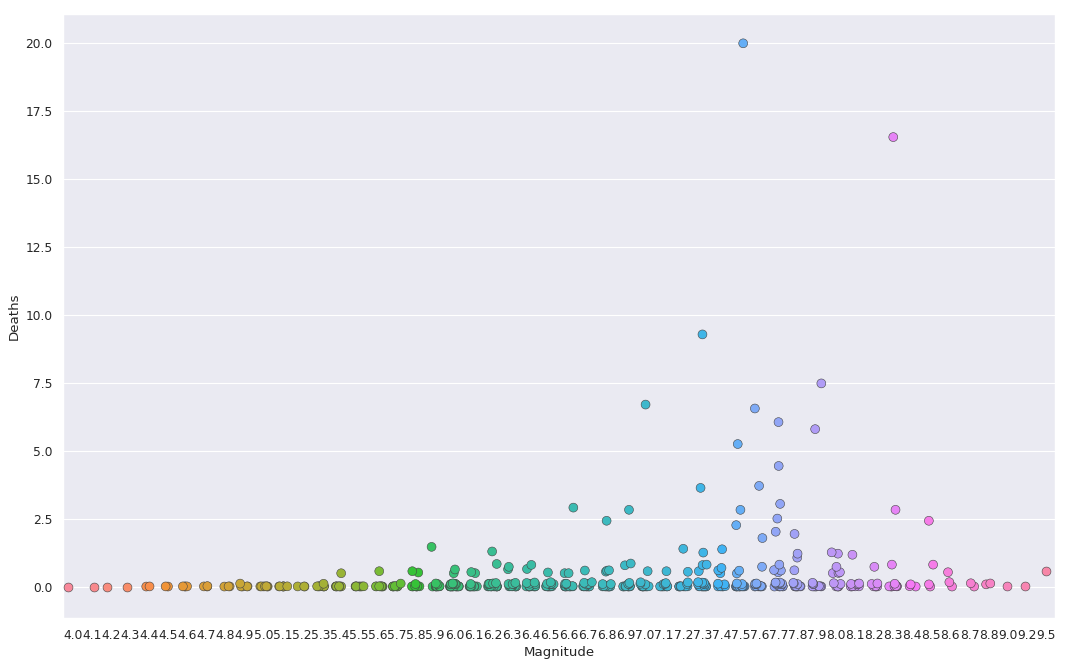

In [149]:
df_counts = damage.groupby(['Magnitude', 'Deaths']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.Magnitude, df_counts.Deaths, jitter=0.25, size=8, ax=ax, linewidth=.5)

In [0]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [0]:
# # As many colors as there are unique Magnitudes
# magnitudes = np.unique(damage['Magnitude'])
# colors = [plt.cm.tab10(i/float(len(magnitudes)-1)) for i in range(len(magnitudes))]

# # Step 2: Draw Scatterplot with unique color for each magnitude
# fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

# # for i, magnitude in enumerate(magnitudes):
# plt.scatter('Deaths', 'Damage', data=damage.loc[damage.Magnitude==magnitude, :], s='dot_size', c=colors[i], label=str(magnitude), edgecolors='black', linewidths=.5)

    
# # Step 3: Encircling
# # https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
# def encircle(x,y, ax=None, **kw):
#     if not ax: ax=plt.gca()
#     p = np.c_[x,y]
#     hull = ConvexHull(p)
#     poly = plt.Polygon(p[hull.vertices,:], **kw)
#     ax.add_patch(poly)

# # Select data to be encircled
# damage_encircle_data = damage.loc[damage.Magnitude >= 5.0, :]                         

# # Draw polygon surrounding vertices    
# encircle(damage_encircle_data.Deaths, damage_encircle_data.Damage, ec="k", fc="gold", alpha=0.1)
# encircle(damage_encircle_data.Deaths, damage_encircle_data.Damage, ec="firebrick", fc="none", linewidth=1.5)

# # Step 4: Decorations
# plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
#               xlabel='Deaths', ylabel='Damage')

# plt.xticks(fontsize=12); plt.yticks(fontsize=12)
# plt.title("Bubble Plot with Encircling", fontsize=22)
# plt.legend(fontsize=12)    
# plt.show()    

/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


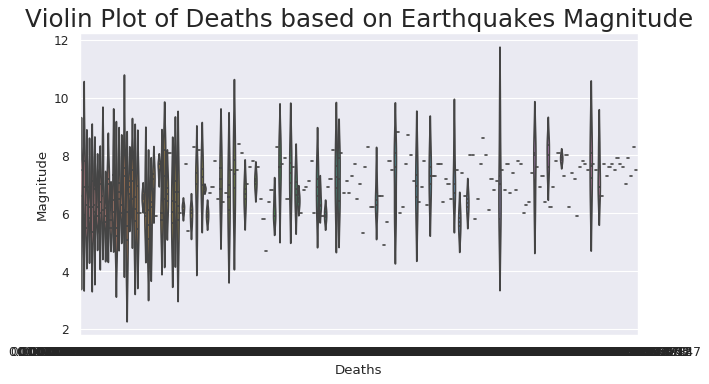

In [121]:
# Draw Plot
plt.figure(figsize=(9, 5), dpi= 80)
sns.violinplot(x='Deaths', y='Magnitude', data=damage, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Deaths based on Earthquakes Magnitude', fontsize=22)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


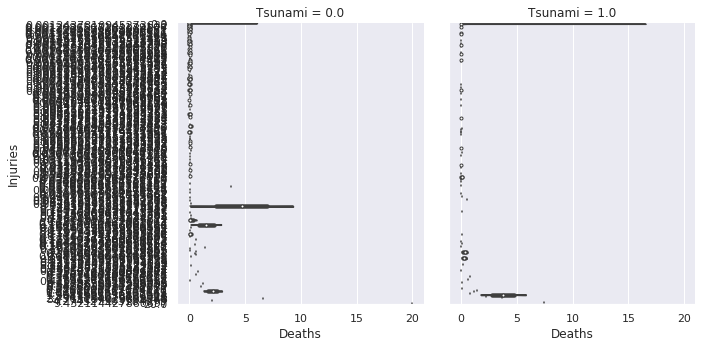

In [123]:
# Plot
sns.catplot(x="Deaths", y="Injuries",
            hue="Tsunami", col="Tsunami",
            data=X,
            orient="h", height=5, aspect=1, palette="tab10",
            kind="violin", dodge=True, cut=0, bw=.2)